In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, r2_score, f1_score
from scipy import stats

In [17]:
state_data = pd.read_csv('State_Unique_Data.csv')

In [18]:
state_data

,YearStart,YearEnd,LocationAbbr,State,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Overall Public School Rank 2024,K-12 Performance 2024,School Funding and Resources 2024,Higher Ed Quality 2024,School Safety Rank 2024
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,13.6,...,DIA,DIA01,CRDPREV,SEX,SEXM,45,42,35,30,43
1,2021,2021,AR,Arkansas,BRFSS,Asthma,Current asthma among adults,%,Crude Prevalence,8.0,...,AST,AST02,CRDPREV,SEX,SEXM,45,42,35,30,43
2,2021,2021,AR,Arkansas,BRFSS,Health Status,Frequent physical distress among adults,%,Crude Prevalence,14.6,...,HEA,HEA03,CRDPREV,OVERALL,OVR,45,42,35,30,43
3,2021,2021,AR,Arkansas,BRFSS,Health Status,Recent activity limitation among adults,Number,Crude Mean,3.4,...,HEA,HEA04,CRDMEAN,SEX,SEXM,45,42,35,30,43
4,2015,2019,AR,Arkansas,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Age-adjusted Rate,548.3,...,CAN,CAN07,AGEADJRATE,SEX,SEXM,45,42,35,30,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179610,2022,2022,VA,Virginia,BRFSS,Diabetes,Diabetes among adults,%,Age-adjusted Prevalence,11.1,...,DIA,DIA01,AGEADJPREV,SEX,SEXF,9,19,21,11,17
179611,2022,2022,VA,Virginia,BRFSS,Oral Health,Six or more teeth lost among adults aged 65 ye...,%,Age-adjusted Prevalence,31.5,...,ORH,ORH02,AGEADJPREV,SEX,SEXM,9,19,21,11,17
179612,2022,2022,VA,Virginia,BRFSS,Alcohol,Binge drinking frequency among adults who bing...,Number,Crude 75th percentile,5.1,...,ALC,ALC04,CRD75TH,SEX,SEXM,9,19,21,11,17
179613,2022,2022,VA,Virginia,BRFSS,Health Status,Frequent physical distress among adults,%,Age-adjusted Prevalence,12.2,...,HEA,HEA03,AGEADJPREV,RACE,WHT,9,19,21,11,17


In [20]:
dummies2 = pd.get_dummies(state_data['Topic'])
#dummies3 = pd.get_dummies(state_data['State'])
#dummies = pd.get_dummies(state_data['LocationAbbr'])


states_data = pd.concat([state_data, dummies2], axis=1)
states_data.drop(['StratificationID1','StratificationCategoryID1','DataValueTypeID','QuestionID', 'TopicID', 'StratificationCategory1', 'DataValueType', 'DataValueUnit', 'Question','DataSource', 'LocationID', 'Stratification1', 'LocationAbbr', 'State', 'Topic', 'YearStart', 'YearEnd', 'K-12 Performance 2024','School Funding and Resources 2024', 'Higher Ed Quality 2024', 'School Safety Rank 2024', 'DataValue', 'DataValueAlt', 'LowConfidenceLimit', 'HighConfidenceLimit' ], axis=1, inplace=True)
display(states_data)

,Overall Public School Rank 2024,Alcohol,Arthritis,Asthma,Cancer,Cardiovascular Disease,Chronic Obstructive Pulmonary Disease,Cognitive Health and Caregiving,Diabetes,Disability,Health Status,Immunization,Maternal Health,Mental Health,"Nutrition, Physical Activity, and Weight Status",Oral Health,Sleep,Social Determinants of Health,Tobacco
0,45,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,45,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,45,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,45,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179610,9,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
179611,9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
179612,9,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
179613,9,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [28]:
states_data.head()
X = states_data.drop('Overall Public School Rank 2024', axis=1)
y = states_data['Overall Public School Rank 2024'].values
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.2, random_state = 42)
Lin_Regression = LinearRegression().fit(X_train, y_train)
y_pre = Lin_Regression.predict(X_test)
Lin_Regression.score(X_test, y_test)

0.0006519831639588691

In [30]:
import matplotlib.pyplot as plt 

In [58]:
low_df = state_data[(state_data['Overall Public School Rank 2024'] <= 25)]
display(low_df)

,YearStart,YearEnd,LocationAbbr,State,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Overall Public School Rank 2024,K-12 Performance 2024,School Funding and Resources 2024,Higher Ed Quality 2024,School Safety Rank 2024
6478,2019,2019,IA,Iowa,BRFSS,Asthma,Current asthma among adults,%,Crude Prevalence,10.3,...,AST,AST02,CRDPREV,AGE,AGE1844,22,12,36,26,42
6479,2019,2019,IA,Iowa,BRFSS,Health Status,Recent activity limitation among adults,Number,Crude Mean,2.3,...,HEA,HEA04,CRDMEAN,SEX,SEXF,22,12,36,26,42
6480,2019,2019,IA,Iowa,BRFSS,Mental Health,Depression among adults,%,Crude Prevalence,31.0,...,MEN,MEN02,CRDPREV,RACE,MRC,22,12,36,26,42
6481,2021,2021,IA,Iowa,BRFSS,Mental Health,Depression among adults,%,Crude Prevalence,12.0,...,MEN,MEN02,CRDPREV,SEX,SEXM,22,12,36,26,42
6482,2015,2019,IA,Iowa,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...","per 100,000",Crude Rate,3.9,...,CAN,CAN05,CRDRATE,RACE,HIS,22,12,36,26,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179610,2022,2022,VA,Virginia,BRFSS,Diabetes,Diabetes among adults,%,Age-adjusted Prevalence,11.1,...,DIA,DIA01,AGEADJPREV,SEX,SEXF,9,19,21,11,17
179611,2022,2022,VA,Virginia,BRFSS,Oral Health,Six or more teeth lost among adults aged 65 ye...,%,Age-adjusted Prevalence,31.5,...,ORH,ORH02,AGEADJPREV,SEX,SEXM,9,19,21,11,17
179612,2022,2022,VA,Virginia,BRFSS,Alcohol,Binge drinking frequency among adults who bing...,Number,Crude 75th percentile,5.1,...,ALC,ALC04,CRD75TH,SEX,SEXM,9,19,21,11,17
179613,2022,2022,VA,Virginia,BRFSS,Health Status,Frequent physical distress among adults,%,Age-adjusted Prevalence,12.2,...,HEA,HEA03,AGEADJPREV,RACE,WHT,9,19,21,11,17


In [60]:
high_df = state_data[(state_data['Overall Public School Rank 2024'] > 25)]
display(high_df)

,YearStart,YearEnd,LocationAbbr,State,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Overall Public School Rank 2024,K-12 Performance 2024,School Funding and Resources 2024,Higher Ed Quality 2024,School Safety Rank 2024
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,13.6,...,DIA,DIA01,CRDPREV,SEX,SEXM,45,42,35,30,43
1,2021,2021,AR,Arkansas,BRFSS,Asthma,Current asthma among adults,%,Crude Prevalence,8.0,...,AST,AST02,CRDPREV,SEX,SEXM,45,42,35,30,43
2,2021,2021,AR,Arkansas,BRFSS,Health Status,Frequent physical distress among adults,%,Crude Prevalence,14.6,...,HEA,HEA03,CRDPREV,OVERALL,OVR,45,42,35,30,43
3,2021,2021,AR,Arkansas,BRFSS,Health Status,Recent activity limitation among adults,Number,Crude Mean,3.4,...,HEA,HEA04,CRDMEAN,SEX,SEXM,45,42,35,30,43
4,2015,2019,AR,Arkansas,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Age-adjusted Rate,548.3,...,CAN,CAN07,AGEADJRATE,SEX,SEXM,45,42,35,30,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171987,2022,2022,CO,Colorado,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,28.8,...,ART,ART01,CRDPREV,AGE,AGE4564,35,17,33,28,22
171988,2022,2022,CO,Colorado,BRFSS,Health Status,2 or more chronic conditions among adults,%,Age-adjusted Prevalence,13.8,...,HEA,HEA05,AGEADJPREV,SEX,SEXM,35,17,33,28,22
171989,2022,2022,CO,Colorado,BRFSS,Oral Health,Six or more teeth lost among adults aged 65 ye...,%,Age-adjusted Prevalence,51.5,...,ORH,ORH02,AGEADJPREV,RACE,BLK,35,17,33,28,22
171990,2022,2022,CO,Colorado,BRFSS,Mental Health,Average mentally unhealthy days among adults,Number,Crude Mean,5.1,...,MEN,MEN04,CRDMEAN,OVERALL,OVR,35,17,33,28,22


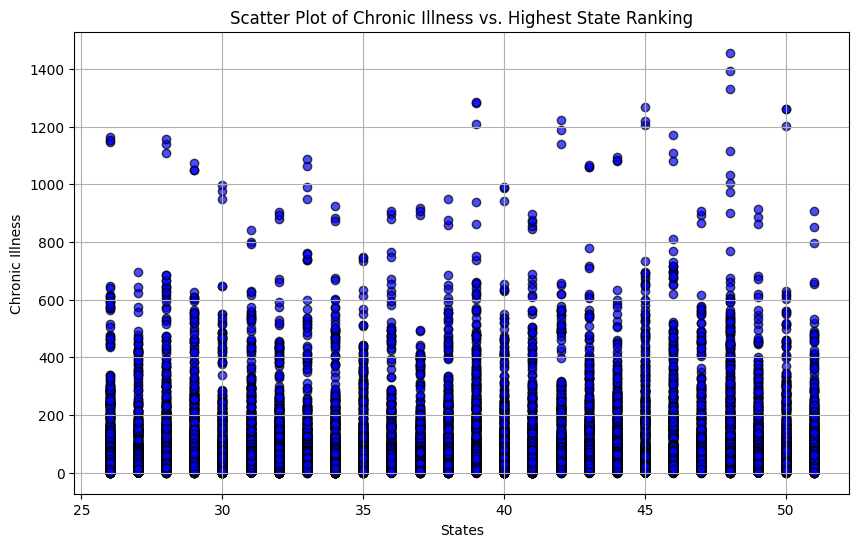

In [68]:
plt.figure(figsize=(10, 6)) # size of the plot in inches (width, height)
plt.scatter(high_df['Overall Public School Rank 2024'], high_df['DataValue'], c='blue', edgecolors='black', alpha=0.7)
plt.title('Scatter Plot of Chronic Illness vs. Highest State Ranking')
plt.xlabel('States')
plt.ylabel('Chronic Illness')
plt.grid(True)
plt.show()

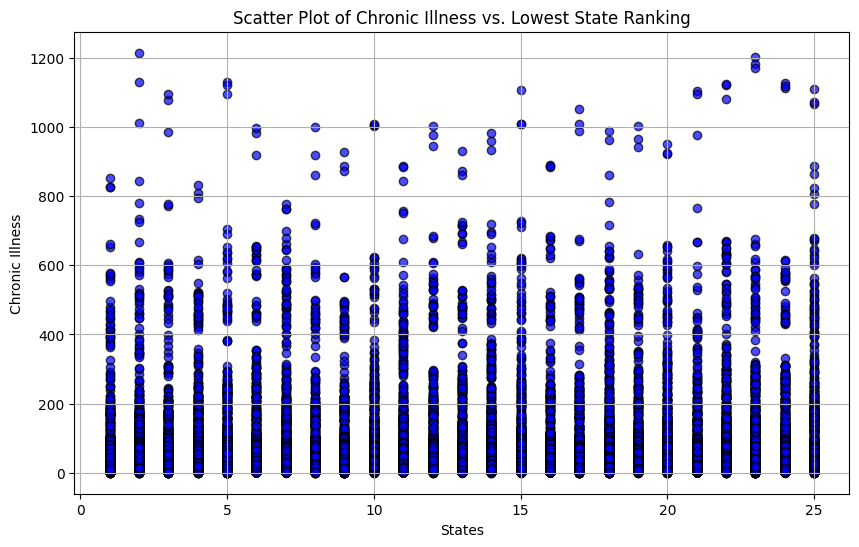

In [70]:
plt.figure(figsize=(10, 6)) # size of the plot in inches (width, height)
plt.scatter(low_df['Overall Public School Rank 2024'], low_df['DataValue'], c='blue', edgecolors='black', alpha=0.7)
plt.title('Scatter Plot of Chronic Illness vs. Lowest State Ranking')
plt.xlabel('States')
plt.ylabel('Chronic Illness')
plt.grid(True)
plt.show()